In [1]:
import IPython
import json
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import savgol_filter
from scipy.signal import find_peaks 

sys.path.append("../../")
import didgelab.calc.fft
from didgelab.calc.sim.sim import *
from didgelab.calc.fft import *

geo = [[0, 32], [44.75184929758991, 30.89970197995438], [49.57729126575668, 31.168923768960347], [54.967873192075956, 31.329326966681364], [90.6108950523339, 32.38992761443541], [115.66723345069371, 31.56010686410169], [382.3585011135245, 33.335466478176244], [577.3073704027173, 34.29253197515777], [595.5401720221591, 43.49680571141982], [613.772973641601, 51.998191018424194], [632.0057752610428, 59.1092720860049], [637.4393615513678, 63.00837626866012], [650.2385768804846, 64.25264473887026], [668.4713784999265, 67.00827535480059], [686.7041801193683, 67.14827594514578], [704.9369817388101, 64.6562176541145], [723.1697833582521, 59.72934903909098], [741.4025849776939, 52.76346753534913], [759.6353865971357, 44.32160075620578], [762.0464531285053, 40.36197031418674], [777.8681882165776, 35.08897441011461], [850.6776076051298, 34.72681290369601], [881.6055202312654, 35.50092333516528], [997.7959501744169, 64.3388143456884], [1127.3358777804367, 70.77864209499438], [1183.600555228752, 74.66572458191796], [1259.3473388074553, 77.3413373632347], [1536.218593051003, 82.5235463235756], [1615.388941763838, 83.01764041772911], [1650.176863581173, 84.3593888504906], [1679.773777156785, 85.50092333516528], [1680.9010451815461, 76.66737047937056], [1692.7146051403229, 87.5536368201435], [1696.0882133064615, 88.08876880586146], [1697.583895109889, 88.32601840156258], [1712.2821558389335, 90.6575012126019]]
geo = Geo(geo)
geo

,note_name,cent_diff,note_nr,freq,impedance,rel_imp
0,D2,2.368344,-31,73.516695,21.411771,1.000000
1,D3,-2.631656,-19,146.609353,9.112844,0.425600
2,A3,-2.631656,-12,219.665831,11.835005,0.552734
3,F4,2.368344,-4,349.706306,0.437023,0.020410
4,A4,2.368344,0,440.602336,16.311108,0.761782
5,F5,-7.631656,8,695.384291,5.791502,0.270482
6,B5,2.368344,14,989.118801,1.656847,0.077380


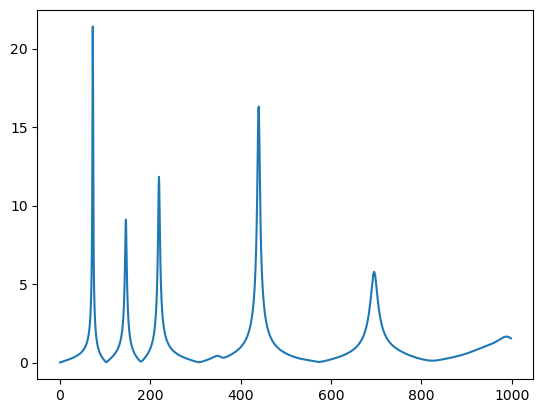

In [2]:
segments = create_segments(geo)
freqs = get_log_simulation_frequencies(1, 1000, 5)
impedances = compute_impedance(segments, freqs)

plt.plot(freqs, impedances)
pred_notes = get_notes(freqs, impedances)
pred_notes

In [ ]:
!pip install librosa

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load('samples/arusha.wav')

# Use librosa's onset detection function
# 'onsets' will contain the frame indices of the detected onsets
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, hop_length=512)

# Convert frame indices to time
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=512)

print("Detected transient times (in seconds):", onset_times)

# Optional: Visualize the waveform and onset events
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.vlines(onset_times, -1, 1, color='r', linestyle='--', label='Onsets')
plt.title('Audio Waveform with Detected Transients')
plt.legend()
plt.show()


In [3]:
wav = "samples/arusha.wav"

def do_fft(infile, maxfreq=1000, offset=0, end=None):
    sampFreq, sound = wavfile.read(infile)
    
    # use only left channel if signal is stereo
    if len(sound.shape)==2:
        signal = sound[:,0]
    else:
        signal = sound

    if end is not None:
        signal = signal[0:end]

    signal = signal[offset:]

    size=len(signal)
    fft_spectrum = np.fft.rfft(signal, n=size)
    freq = np.fft.rfftfreq(size, d=1./sampFreq)
    fft_spectrum_abs = np.abs(fft_spectrum)
 
    i=0
    while i<len(freq) and freq[i]<=maxfreq:
        i+=1
    freq = freq[0:i]
    fft_spectrum_abs = fft_spectrum_abs[0:i]

    return freq, fft_spectrum_abs

for offset in np.arange(100, 2000, 100):
    fft_freq, fft_amp = do_fft(wav, offset=offset)


    peak_indizes = find_peaks(fft_amp)[0]
    peak_freqs = fft_freq[peak_indizes]

    tuning = note_to_freq(-31)

    this_tuning = []
    for freq in pred_notes.freq:
        f = peak_freqs[np.argmin(np.abs(peak_freqs-note))]
        this_tuning.append(f)
    freqs.append(this_tuning)

freqs = np.mean(freqs, axis=0)
freqs

fft_freq, fft_amp = do_fft(wav, offset=0)

peak_indizes = find_peaks(fft_amp)[0]
fft_freq[peak_indizes]

NameError: name 'note' is not defined

In [18]:
wav = "samples/arusha.wav"

def do_fft(infile, maxfreq=1000, offset=0, end=None):
    sampFreq, sound = wavfile.read(infile)
    
    # use only left channel if signal is stereo
    if len(sound.shape)==2:
        signal = sound[:,0]
    else:
        signal = sound

    if end is not None:
        signal = signal[0:end]

    signal = signal[offset:]

    size=len(signal)
    fft_spectrum = np.fft.rfft(signal, n=size)
    freq = np.fft.rfftfreq(size, d=1./sampFreq)
    fft_spectrum_abs = np.abs(fft_spectrum)
 
    i=0
    while i<len(freq) and freq[i]<=maxfreq:
        i+=1
    freq = freq[0:i]
    fft_spectrum_abs = fft_spectrum_abs[0:i]

    return freq, fft_spectrum_abs

freqs = []

offsets = np.arange(0, 2000, 10)
for offset in offsets:
    fft_freq, fft_amp = do_fft(wav, offset=offset)


    peak_indizes = find_peaks(fft_amp)[0]
    peak_freqs = fft_freq[peak_indizes]

    tuning = note_to_freq(-31)
    f = peak_freqs[np.argmin(np.abs(peak_freqs-tuning))]
    freqs.append(f)

freqs = np.array(freqs)
freqs = freqs[(freqs<tuning*1.1) & (freqs>tuning*0.9)]
np.mean(freqs)
#plt.plot(offsets, freqs)

73.67479087555078

,note_name,cent_diff,note_nr,freq,impedance,rel_imp,actual
0,D2,2.368344,-31,73.516695,21.411771,1.000000,76.167335
1,D3,-2.631656,-19,146.609353,9.112844,0.425600,143.526659
2,A3,-2.631656,-12,219.665831,11.835005,0.552734,213.461470
3,F4,2.368344,-4,349.706306,0.437023,0.020410,343.688868
4,A4,2.368344,0,440.602336,16.311108,0.761782,433.445927
5,F5,-7.631656,8,695.384291,5.791502,0.270482,702.656298
6,B5,2.368344,14,989.118801,1.656847,0.077380,972.205372


In [21]:
from scipy.signal import find_peaks 

peak_indizes = find_peaks(fft_amp)[0]
peak_freqs = fft_freq[peak_indizes]
peak_freqs

array([  7.99927444,  23.99782333,  55.9949211 ,  71.99346998,
       111.98984219, 143.98693996, 167.98476329, 191.98258661,
       207.9811355 , 231.97895882, 271.97533104, 287.97387992,
       311.97170325, 343.96880102, 359.9673499 , 383.96517323,
       423.96154544, 439.96009432, 455.95864321, 479.95646653,
       503.95428986, 535.95138763, 551.94993651, 583.94703428,
       615.94413205, 647.94122982, 663.9397787 , 679.93832759,
       703.93615092, 727.93397424, 751.93179757, 767.93034645,
       799.92744422, 815.92599311, 847.92309088, 879.92018865,
       919.91656086, 935.91510974, 959.91293307, 991.91003084])

In [44]:
basefreq = note_to_freq(-31)
44100 / basefreq

600.6849280932879